# Summary of grid search results

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Approved plan results
dose_approved = 2000
volume_approved = 10
oar_avg_approved = 318.4594544159879
ptv_d95_approved = 4800.13222492 

# Grid values
doses = np.arange(0, 2001, 100)
volumes = np.arange(0, 11, 1)

# Raw Data

In [119]:
# Tuesday
oar_avg_1 = np.load('results_5_19/oar_avg_5_19.npy')
ptv_d95_1 = np.load('results_5_19/ptv_d95_5_19.npy')

# Wednesday
oar_avg_2 = np.load('oar_avg_5_20.npy')
ptv_d95_2 = np.load('ptv_d95_5_20.npy')

# Combined
oar_avg = np.empty_like(oar_avg_1)
oar_avg[:7,:] = oar_avg_1[:7,:]
oar_avg[7:,:] = oar_avg_2[7:,:]
ptv_d95 = np.empty_like(ptv_d95_1)
ptv_d95[:7,:] = ptv_d95_1[:7,:]
ptv_d95[7:,:] = ptv_d95_2[7:,:]

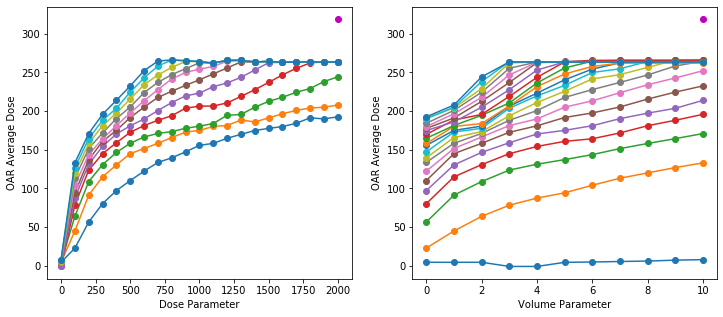

In [89]:
# Plot OAR dose vs. OAR dose and percent parameters 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(volumes)):
    ax[0].plot(doses, oar_avg[:, ii], 'o-')
ax[0].plot(dose_approved, oar_avg_approved, 'mo')
    
for ii in range(len(doses)):
    ax[1].plot(volumes, oar_avg[ii, :], 'o-')
ax[1].plot(volume_approved, oar_avg_approved, 'mo')
    
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('OAR Average Dose')
ax[1].set_xlabel('Volume Parameter')
ax[1].set_ylabel('OAR Average Dose');

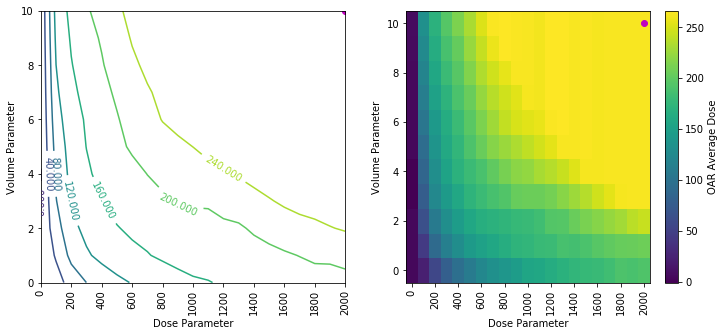

In [92]:
# Plot OAR dose vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(oar_avg.T)
ax[0].clabel(im0)
ax[0].set_xticks(ticks=np.arange(0, 21, 2))
ax[0].set_xticklabels(labels=np.arange(0, 2001, 200), rotation=90)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].plot(20, 10, 'mo')

im1 = ax[1].imshow(oar_avg.T, origin='lower')
ax[1].set_xticks(ticks=np.arange(0, 21, 2))
ax[1].set_xticklabels(labels=np.arange(0, 2001, 200), rotation=90)
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
ax[1].axis('auto')
plt.colorbar(im1, label='OAR Average Dose');
ax[1].plot(20, 10, 'mo')

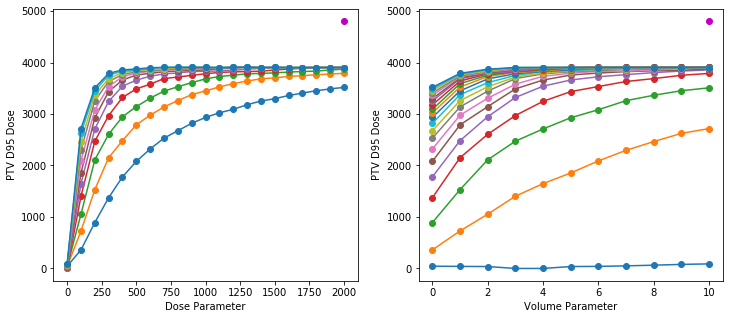

In [93]:
# Plot PTV dose vs. OAR dose and percent parameters 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(volumes)):
    ax[0].plot(doses, ptv_d95[:, ii], 'o-')
ax[0].plot(dose_approved, ptv_d95_approved, 'mo')
    
for ii in range(len(doses)):
    ax[1].plot(volumes, ptv_d95[ii, :], 'o-')
ax[1].plot(volume_approved, ptv_d95_approved, 'mo')

ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('PTV D95 Dose')
ax[1].set_xlabel('Volume Parameter')
ax[1].set_ylabel('PTV D95 Dose');

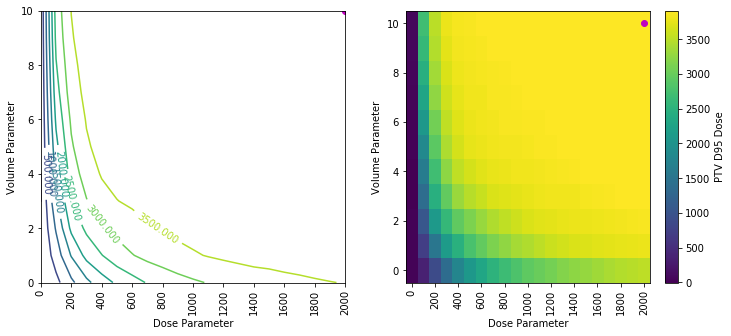

In [96]:
# Plot PTV dose vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(ptv_d95.T)
ax[0].clabel(im0)
ax[0].set_xticks(ticks=np.arange(0, 21, 2))
ax[0].set_xticklabels(labels=np.arange(0, 2001, 200), rotation=90)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].plot(20, 10, 'mo')

im1 = ax[1].imshow(ptv_d95.T, origin='lower')
ax[1].set_xticks(ticks=np.arange(0, 21, 2))
ax[1].set_xticklabels(labels=np.arange(0, 2001, 200), rotation=90)
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
ax[1].axis('auto')
plt.colorbar(im1, label='PTV D95 Dose');
ax[1].plot(20, 10, 'mo')

In [48]:
# Lowest OAR average dose s.t. PTV D95 dose >= 3500
min_dose = 1e6
opt_dose = -1
opt_volume = -1
for ii in range(len(doses)):
    for jj in range(len(volumes)):
        if ptv_d95[ii, jj] >= 3500:
            if oar_avg[ii, jj] < min_dose:
                min_dose = oar_avg[ii, jj]
                opt_dose =  doses[ii]
                opt_volume = volumes[jj]
print(f'Dose: {opt_dose}, Volume: {opt_volume}, Min dose: {min_dose}')

Dose: 300, Volume: 6, Min dose: 164.06436395941557


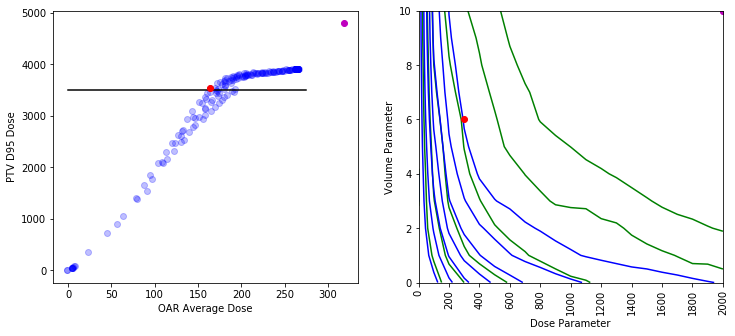

In [98]:
# Plot PTV D95 vs. OAR dose
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    for jj in range(len(volumes)):
        ax[0].plot(oar_avg[ii, jj], ptv_d95[ii, jj], 'bo', alpha=0.25)
ax[0].set_xlabel('OAR Average Dose')
ax[0].set_ylabel('PTV D95 Dose')
ax[0].plot([0, 275], [3500, 3500], 'k')
ax[0].plot(oar_avg[3, 6], ptv_d95[3, 6], 'ro')       # optimal point
ax[0].plot(oar_avg_approved, ptv_d95_approved, 'mo') # approved point

ax[1].contour(oar_avg.T, colors='g')
ax[1].contour(ptv_d95.T, colors='b')
ax[1].plot(3, 6, 'ro')   # optimal point
ax[1].plot(20, 10, 'mo') # approved point
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
ax[1].set_xticks(ticks=np.arange(0, 21, 2))
ax[1].set_xticklabels(labels=np.arange(0, 2001, 200), rotation=90);
ax[1].plot(20, 10, 'mo')

# Normalized Data

In [123]:
# Tuesday
oar_avg_norm_1 = np.load('results_5_19/oar_avg_norm_5_19.npy')
ptv_d95_norm_1 = np.load('results_5_19/ptv_d95_norm_5_19.npy')

# Wednesday
oar_avg_norm_2 = np.load('oar_avg_norm_5_20.npy')
ptv_d95_norm_2 = np.load('ptv_d95_norm_5_20.npy')

# Combined
oar_avg_norm = np.empty_like(oar_avg_norm_1)
oar_avg_norm[:7,:] = oar_avg_norm_1[:7,:]
oar_avg_norm[7:,:] = oar_avg_norm_2[7:,:]
ptv_d95_norm = np.empty_like(ptv_d95_norm_1)
ptv_d95_norm[:7,:] = ptv_d95_norm_1[:7,:]
ptv_d95_norm[7:,:] = ptv_d95_norm_2[7:,:]

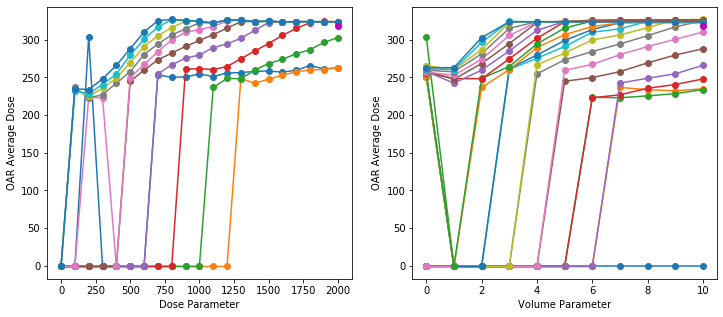

In [105]:
# Plot OAR dose vs. OAR dose and percent parameters 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(volumes)):
    ax[0].plot(doses, oar_avg_norm[:, ii], 'o-')
ax[0].plot(dose_approved, oar_avg_approved, 'mo')
    
for ii in range(len(doses)):
    ax[1].plot(volumes, oar_avg_norm[ii, :], 'o-')
ax[1].plot(volume_approved, oar_avg_approved, 'mo')

ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('OAR Average Dose')
ax[1].set_xlabel('Volume Parameter')
ax[1].set_ylabel('OAR Average Dose');

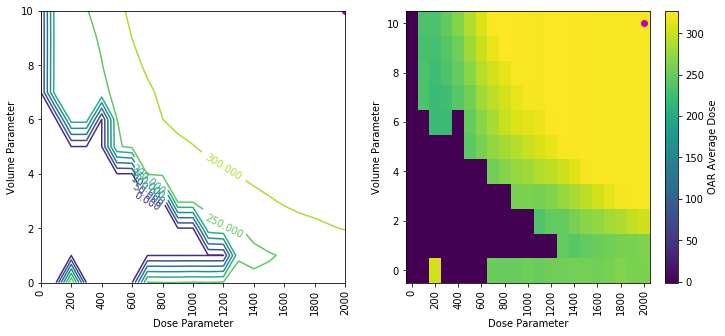

In [107]:
# Plot OAR dose vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(oar_avg_norm.T)
ax[0].clabel(im0)
ax[0].set_xticks(ticks=np.arange(0, 21, 2))
ax[0].set_xticklabels(labels=np.arange(0, 2001, 200), rotation=90)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].plot(20, 10, 'mo')

im1 = ax[1].imshow(oar_avg_norm.T, origin='lower')
ax[1].set_xticks(ticks=np.arange(0, 21, 2))
ax[1].set_xticklabels(labels=np.arange(0, 2001, 200), rotation=90)
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
ax[1].axis('auto')
plt.colorbar(im1, label='OAR Average Dose');
ax[1].plot(20, 10, 'mo')

# Extrapolation

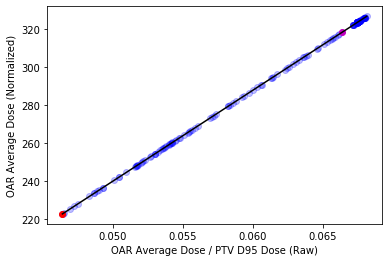

In [108]:
# Grab raw values where normalization worked
oar_raw = oar_avg[oar_avg_norm > -1]
ptv_raw = ptv_d95[oar_avg_norm > -1]
oar_norm = oar_avg_norm[oar_avg_norm > -1]
ptv_norm = ptv_d95_norm[oar_avg_norm > -1]

# Plot raw ratio vs. normalized dose 
plt.plot(oar_raw/ptv_raw, oar_norm, 'bo', alpha=0.25)
plt.plot(oar_avg[3, 6]/ptv_d95[3, 6], oar_avg_norm[3, 6], 'ro')
plt.xlabel('OAR Average Dose / PTV D95 Dose (Raw)')
plt.ylabel('OAR Average Dose (Normalized)');
plt.plot(oar_avg_approved/ptv_d95_approved, oar_avg_approved, 'mo')

# Plot line with slope 4800
left = min(oar_raw/ptv_raw)
right = max(oar_raw/ptv_raw)
plt.plot([left, right], [4800*left, 4800*right], 'k')

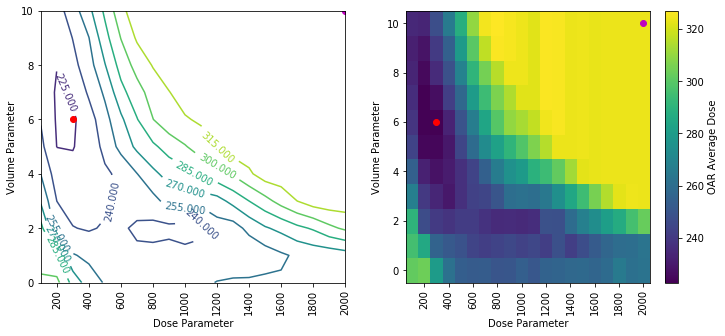

In [144]:
# Plot OAR dose vs. OAR dose and percent parameters
oar_avg_norm_2 = oar_avg_norm
oar_avg_norm_2[oar_avg_norm == -1] = 4800*oar_avg[oar_avg_norm == -1]/ptv_d95[oar_avg_norm == -1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(oar_avg_norm_2[1:].T)
ax[0].clabel(im0)
ax[0].set_xticks(ticks=np.arange(1, 20, 2))
ax[0].set_xticklabels(labels=np.arange(200, 2001, 200), rotation=90)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].plot(2, 6, 'ro')
ax[0].plot(19, 10, 'mo')

im1 = ax[1].imshow(oar_avg_norm_2[1:].T, origin='lower')
ax[1].set_xticks(ticks=np.arange(1, 20, 2))
ax[1].set_xticklabels(labels=np.arange(200, 2001, 200), rotation=90)
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
ax[1].axis('auto')
ax[1].plot(2, 6, 'ro')
plt.colorbar(im1, label='OAR Average Dose');
ax[1].plot(19, 10, 'mo')

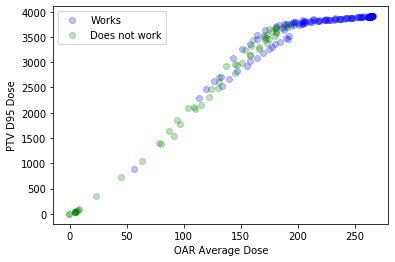

In [127]:
# Why did normalization not work?

plt.plot(oar_raw, ptv_raw, 'bo', alpha=0.25)
plt.xlabel('OAR Average Dose')
plt.ylabel('PTV D95 Dose')

oar_bad = oar_avg[oar_avg_norm == -1]
ptv_bad = ptv_d95[oar_avg_norm == -1]
plt.plot(oar_bad, ptv_bad, 'go', alpha=0.25)

plt.legend(['Works', 'Does not work'])

(array([ 7.,  9., 13., 22.,  9.,  8.,  8.,  9., 10., 78.]),
 array([222.86260939, 233.27362381, 243.68463823, 254.09565266,
        264.50666708, 274.9176815 , 285.32869593, 295.73971035,
        306.15072477, 316.5617392 , 326.97275362]),
 <a list of 10 Patch objects>)

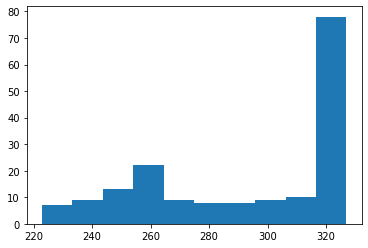

In [141]:
plt.hist(4800*oar_raw/ptv_raw)

(array([40.,  6.,  1.,  0.,  0.,  2.,  1.,  1.,  2.,  3.]),
 array([224.50800901, 261.00376482, 297.49952063, 333.99527644,
        370.49103225, 406.98678806, 443.48254387, 479.97829968,
        516.47405549, 552.9698113 , 589.46556711]),
 <a list of 10 Patch objects>)

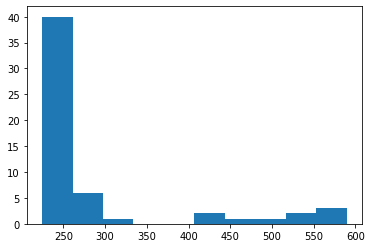

In [142]:
plt.hist(4800*oar_bad[oar_bad > -1]/ptv_bad[oar_bad > -1])

(array([2., 1., 0., 0., 1., 0., 2., 0., 1., 2.]),
 array([427.45664622, 443.65753831, 459.8584304 , 476.05932249,
        492.26021458, 508.46110667, 524.66199876, 540.86289085,
        557.06378294, 573.26467503, 589.46556711]),
 <a list of 10 Patch objects>)

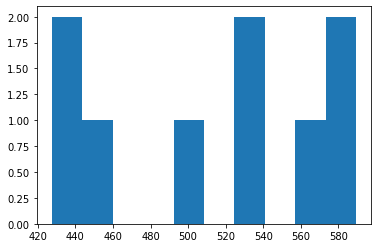

In [150]:
# I think the high ones are the zero dose values... so maybe there isn't some easy way to 
# predict if normalization wont work

oar_zero = oar_avg[0, :]
ptv_zero = ptv_d95[0, :]
plt.hist(4800*oar_zero[oar_zero > -1]/ptv_zero[oar_zero > -1])

(array([15., 26., 26., 25., 10.,  9., 10., 11., 10., 78.]),
 array([222.86260939, 233.27362381, 243.68463823, 254.09565266,
        264.50666708, 274.9176815 , 285.32869593, 295.73971035,
        306.15072477, 316.5617392 , 326.97275362]),
 <a list of 10 Patch objects>)

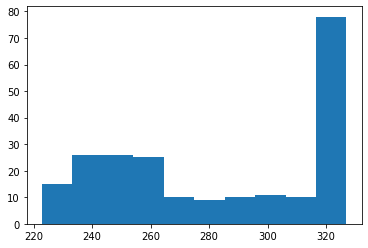

In [152]:
oar_nzero = oar_avg[1:, :]
ptv_nzero = ptv_d95[1:, :]
plt.hist(4800*oar_nzero[oar_nzero > -1]/ptv_nzero[oar_nzero > -1])

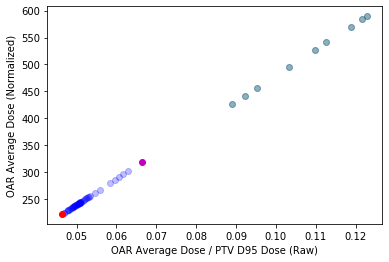

In [169]:
# Plot raw ratio vs. normalized dose 

idx = oar_bad > -1
idx2 = oar_zero > -1
plt.plot(oar_bad[idx]/ptv_bad[idx], 4800*oar_bad[idx]/ptv_bad[idx], 'bo', alpha=0.25)
plt.plot(oar_zero[idx2]/ptv_zero[idx2], 4800*oar_zero[idx2]/ptv_zero[idx2], 'go', alpha=0.25)
plt.plot(oar_avg[3, 6]/ptv_d95[3, 6], oar_avg_norm[3, 6], 'ro')
plt.xlabel('OAR Average Dose / PTV D95 Dose (Raw)')
plt.ylabel('OAR Average Dose (Normalized)');
plt.plot(oar_avg_approved/ptv_d95_approved, oar_avg_approved, 'mo')

In [170]:
# Ratio doesn't look helpful for predicting if normalization possible
# normalization never possible for dose = 0

In [171]:
# I could do the Bayesian optimization with the predicted normalized dose, but wouldn't know if it's feasible
# I could do optimization with normalized dose, but would that get skewed by infeasible values?